In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [18]:
df = pd.read_csv("combinedblockandreturn.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
df

,yardline_100,Blocked,Degree of Precipitation,Sub 32 degrees/15 mph wind?
0,16.0,0.0,0.0,0.0
1,28.0,0.0,0.0,0.0
2,22.0,0.0,0.0,0.0
3,41.0,0.0,0.0,0.0
4,20.0,0.0,0.0,0.0
...,...,...,...,...
409,9.0,1.0,0.0,0.0
410,32.0,1.0,0.0,0.0
411,10.0,1.0,0.0,0.0
412,45.0,1.0,2.0,2.0


In [19]:
X = df.drop(['Blocked'], axis = 1)
y = df['Blocked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [20]:
model = LogisticRegression(random_state=0, multi_class='multinomial', 
                           solver='newton-cg').fit(X, y)
model.fit(X, y)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [21]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.837 (0.017)


In [22]:
row = [40, 0, 0]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])
#predict probability
yhat1 = model.predict_proba([row])
#predict 
#print('Predicted Probabilities: %s' % yhat1[0])
blocked = ""
prob = 0
if (yhat[0] == 0):
    blocked = "won't be blocked"
    prob = yhat1[0][0]
    percent = prob * 100
else:
    blocked = "will be blocked"
    prob = yhat1[0][1]
    percent = prob * 100
    
    
print("Our model predicts with %.2f%%" % percent, "certainity that the punt", blocked)

Predicted Class: 0
Our model predicts with 78.59% certainity that the punt won't be blocked


/Users/nicksmith/opt/anaconda3/envs/NFL/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/nicksmith/opt/anaconda3/envs/NFL/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
yhat1[0][0]

0.7858787967228834

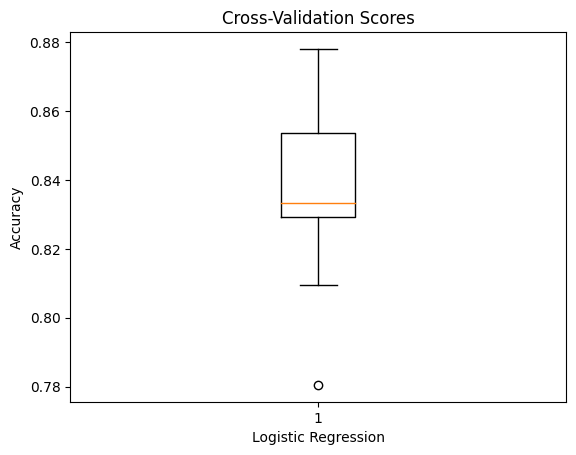

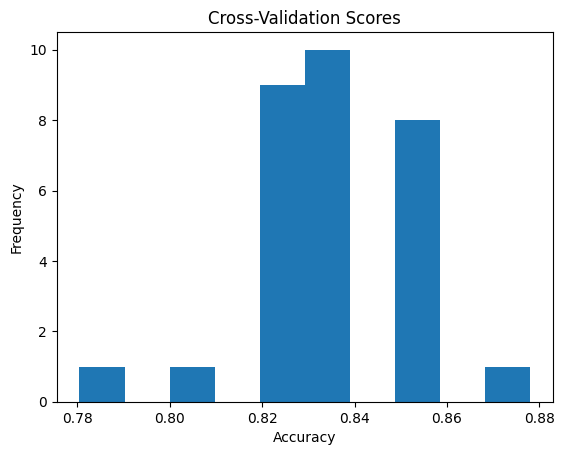

In [24]:
plt.boxplot(scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy')
plt.show()

# Create a histogram of the scores
plt.hist(scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

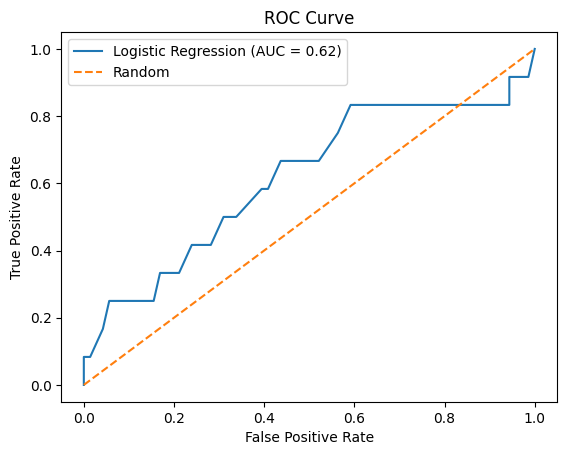

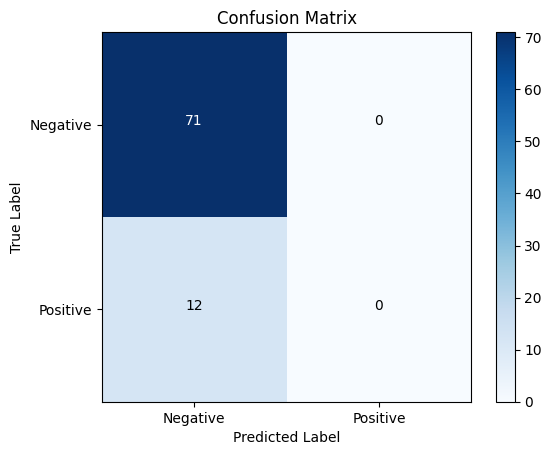

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools


# Predict the probabilities of the test data
y_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and the AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the numbers to the cells
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()


sites to vist: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
               https://www.datasklr.com/logistic-regression/multinomial-logistic-regression
               

KeyError: False

In [37]:
new_df = df[df["Blocked"] == 1]

(array([ 2.,  5.,  3.,  8., 12., 10., 11.,  6.,  6.,  3.]),
 array([ 4.,  9., 14., 19., 24., 29., 34., 39., 44., 49., 54.]),
 <BarContainer object of 10 artists>)

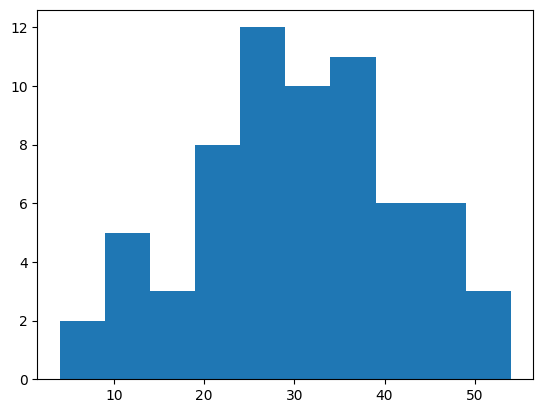

In [38]:
plt.hist(new_df.yardline_100)

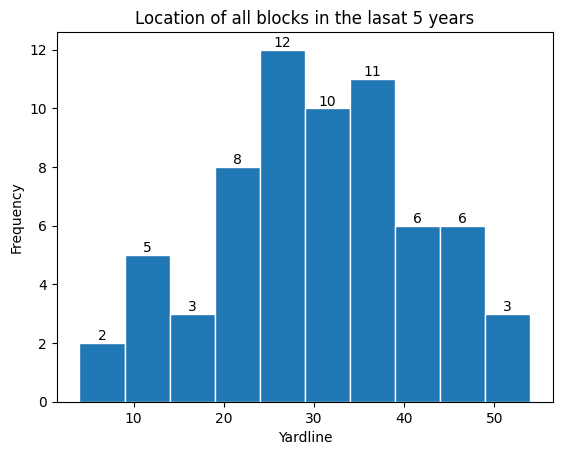

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = new_df.yardline_100

# Create a histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, edgecolor='white', density=False)

# Add count labels above each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    ax.text(x, y, int(n[i]), ha='center', va='bottom')

# Set the title and axis labels
ax.set_title('Location of all blocks in the lasat 5 years')
ax.set_xlabel('Yardline')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [44]:
new_df.yardline_100.describe()

count    66.000000
mean     29.909091
std      11.658905
min       4.000000
25%      23.000000
50%      31.000000
75%      36.750000
max      54.000000
Name: yardline_100, dtype: float64